In [82]:
import pandas as pd
import numpy as np
import json
import math
import networkx as nx

In [71]:
options = pd.read_csv('./csv/lists/places_2020.csv')

In [72]:
areas = []
for i in options["code"]:
    try:
        areas.append(json.load(open(f'/Users/theojolliffe/Documents/Census Data/census-data-main/json/place/{i}.json', 'rb')))
    except FileNotFoundError:
#         print(i)
        pass

In [73]:
lads = []
for i in areas:
    if i['type']=='lad':
        lads.append(i)

In [97]:
# instantiate our graph object
G = nx.Graph()

In [109]:
ladsNorthWest = []
for lad in lads:
    if (lad['parents'][0]['name'] == 'North West') & (lad['data']['population']['value']['2011']['all']>100000):
        ladsNorthWest.append(lad)

In [110]:
len(ladsNorthWest)

29

In [111]:
# Create a function that takes in a dataframe of counties and iterates through it to return the desired list
def process_lads(obArr):
    final_list = []
    for lad in obArr:
        node = (lad['name'], {'population': lad['data']['population']['value']['2011']['all'],
           'area_code': lad['code']})
        final_list.append(node)
    return final_list

In [112]:
# add these nodes to our graph
area_nodes = process_lads(ladsNorthWest)
area_nodes

[('Halton', {'population': 125746, 'area_code': 'E06000006'}),
 ('Warrington', {'population': 202228, 'area_code': 'E06000007'}),
 ('Blackburn with Darwen', {'population': 147489, 'area_code': 'E06000008'}),
 ('Blackpool', {'population': 142065, 'area_code': 'E06000009'}),
 ('Cheshire East', {'population': 370127, 'area_code': 'E06000049'}),
 ('Cheshire West and Chester',
  {'population': 329608, 'area_code': 'E06000050'}),
 ('Carlisle', {'population': 107524, 'area_code': 'E07000028'}),
 ('South Lakeland', {'population': 103658, 'area_code': 'E07000031'}),
 ('Chorley', {'population': 107155, 'area_code': 'E07000118'}),
 ('Lancaster', {'population': 138375, 'area_code': 'E07000121'}),
 ('Preston', {'population': 140202, 'area_code': 'E07000123'}),
 ('South Ribble', {'population': 109057, 'area_code': 'E07000126'}),
 ('West Lancashire', {'population': 110685, 'area_code': 'E07000127'}),
 ('Wyre', {'population': 107749, 'area_code': 'E07000128'}),
 ('Bolton', {'population': 276786, 'area

In [113]:
G.add_nodes_from(area_nodes)

In [114]:
# Create tuples of nearby areas
def ceateEdges(obArr):
    nearbyEdges = []
    for lad in obArr:
        list1 = lad['bounds'][0]+lad['bounds'][1]
        for lad2 in obArr:
            list2 = lad2['bounds'][0]+lad2['bounds'][1]
            listDif = [abs(list1[i]-list2[i]) for i in [0,1,2,3]]
            listDif.sort()
            if (sum(listDif[:3]) < 0.3) & (lad!=lad2):
                nearbyEdges.append((lad['name'], lad2['name']))
    return nearbyEdges

In [115]:
areaEdges = ceateEdges(ladsNorthWest)
areaEdges

[('Halton', 'Warrington'),
 ('Halton', 'Knowsley'),
 ('Halton', 'Liverpool'),
 ('Halton', 'St. Helens'),
 ('Warrington', 'Halton'),
 ('Warrington', 'Trafford'),
 ('Warrington', 'Wigan'),
 ('Warrington', 'Knowsley'),
 ('Warrington', 'St. Helens'),
 ('Blackburn with Darwen', 'Chorley'),
 ('Blackburn with Darwen', 'South Ribble'),
 ('Blackburn with Darwen', 'Bolton'),
 ('Blackpool', 'Preston'),
 ('Blackpool', 'Wyre'),
 ('Chorley', 'Blackburn with Darwen'),
 ('Chorley', 'Preston'),
 ('Chorley', 'South Ribble'),
 ('Chorley', 'St. Helens'),
 ('Preston', 'Blackpool'),
 ('Preston', 'Chorley'),
 ('Preston', 'South Ribble'),
 ('Preston', 'Wyre'),
 ('South Ribble', 'Blackburn with Darwen'),
 ('South Ribble', 'Chorley'),
 ('South Ribble', 'Preston'),
 ('West Lancashire', 'Sefton'),
 ('Wyre', 'Blackpool'),
 ('Wyre', 'Preston'),
 ('Bolton', 'Blackburn with Darwen'),
 ('Bolton', 'Bury'),
 ('Bolton', 'Wigan'),
 ('Bury', 'Bolton'),
 ('Bury', 'Manchester'),
 ('Bury', 'Oldham'),
 ('Bury', 'Rochdale'),
 (

In [116]:
G.add_edges_from(areaEdges)

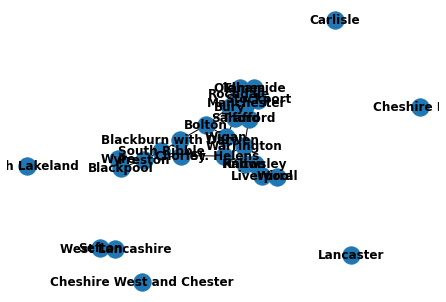

In [117]:
# define a quick function to draw graphs
import matplotlib.pyplot as plt
def draw_graph(G):
    plt.close()
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()
    return

draw_graph(G)